# Pre-Requisites

In [2]:
import numpy as np
import scipy.io
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import StandardScaler

def dataloader(path):
    data = scipy.io.loadmat(path)
    AF = data['AF']
    x1 = AF[:-2]
    y = AF[-2]
    w = AF[-1]
    x2 = data['CF']
    x = np.concatenate((x1, x2), axis=0)
    return x.T, y.T, w.T, data['CF_info']

def calculate_accuracy(arr1, arr2):
    count = sum(1 for itr1, itr2 in zip(arr1, arr2) if itr1 == itr2)
    return count / len(arr1)

def normalization(feats):
    df = pd.DataFrame(feats)
    scaler = StandardScaler()
    x_new = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
    return x_new

def make_partitions(arr_words, arr_labels):
    v = []
    temp = []

    for i in range(len(arr_words) - 1):
        word = arr_words[i]
        next_word = arr_words[i + 1]
        temp.append(arr_labels[i])

        if word != next_word or i == len(arr_words) - 2:
            if i == len(arr_words) - 2:
                temp.append(arr_labels[i + 1])

            numpy_temp = np.array(temp)
            temp_max = np.amax(numpy_temp)
            numpy_temp = np.divide(numpy_temp, temp_max)
            v = np.concatenate((v, numpy_temp), axis=None)
            temp.clear()

    v1 = [1 if i == 1 else 0 for i in v]
    return v1
    
fatyp = 'TypicalFA_comb1'
drivepath = 'finalData/'+ fatyp +'/';
filee = drivepath+'GER_train_fisher-2000_FA_GT_ESTphnTrans_estStress.mat'
original_dim = 38
train_path = filee; test_path = filee.replace('train','test')
xtrain, ytrain, wtrain1, info_train1 = dataloader(train_path);
xtest, ytest, wtest1, info_test1 = dataloader(test_path);
xtest= normalization(xtest)
xtrain= normalization(xtrain)

woPP=[]; wPP=[]
input_shape1 = (19,1)
input_shape2 = (38,1)
temperature = 0.03
learning_rate=0.001

dict_keys(['__header__', '__version__', '__globals__', 'AF', 'AF_info', 'CF', 'CF_info'])
dict_keys(['__header__', '__version__', '__globals__', 'AF', 'AF_info', 'CF', 'CF_info'])


# K-Means

In [4]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(xtrain)

/project/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2, random_state=42)

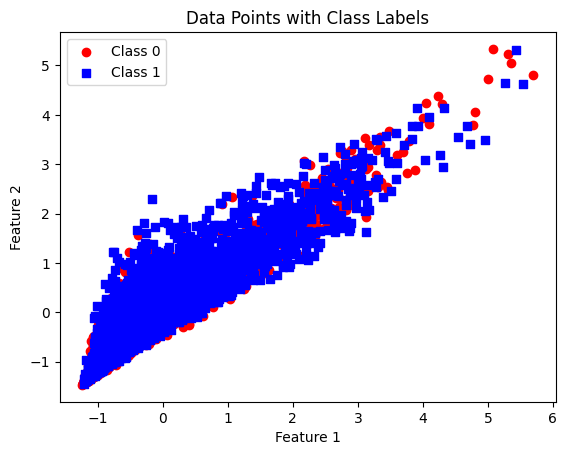

In [35]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have your training data stored in the variable 'x_train' with shape (5891, 2)
# Assuming you have the corresponding classification labels in the variable 'y_train' with shape (5891,)

# Separate data points based on their class labels
class_0_points = xtrain[ytrain == 0]
class_1_points = xtrain[ytrain == 1]

# Plotting the data points
plt.scatter(class_0_points[:, 0], class_0_points[:, 1], c='red', marker='o', label='Class 0')
plt.scatter(class_1_points[:, 0], class_1_points[:, 1], c='blue', marker='s', label='Class 1')

# Add labels and legend
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Data Points with Class Labels')
plt.legend()

# Show the plot
plt.show()

# Impl3ment PCA for Dimensionality Reduction

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(xtrain)

In [36]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np
pca = PCA(2)
df = pca.fit_transform(xtrain)
df.shape

(5891, 2)

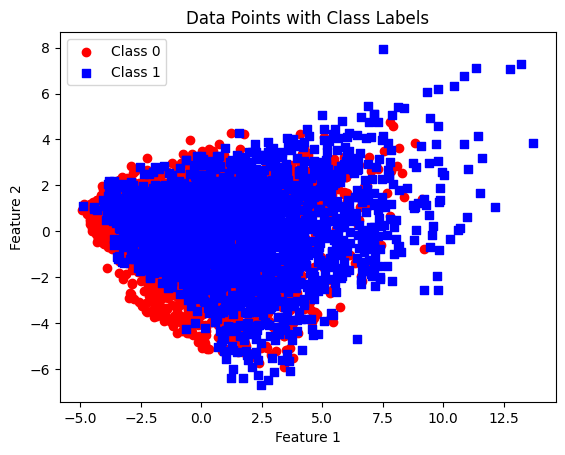

In [37]:
class_0_points = df[ytrain == 0]
class_1_points = df[ytrain == 1]

plt.scatter(class_0_points[:, 0], class_0_points[:, 1], c='red', marker='o', label='Class 0')
plt.scatter(class_1_points[:, 0], class_1_points[:, 1], c='blue', marker='s', label='Class 1')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Data Points with Class Labels')
plt.legend()
plt.show()

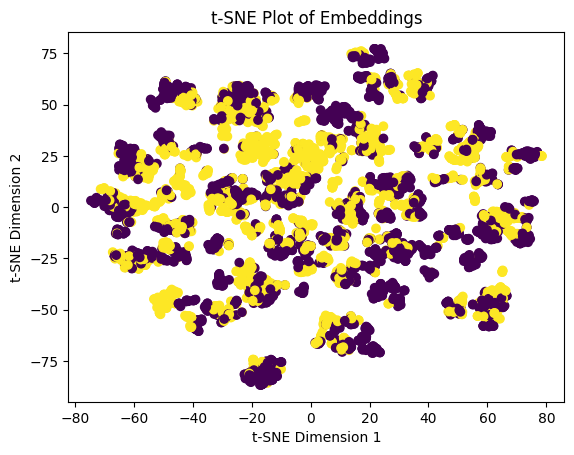

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
embeddings_tsne = tsne.fit_transform(xtrain)
plt.scatter(embeddings_tsne[:, 0], embeddings_tsne[:, 1], c=ytrain)
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.title('t-SNE Plot of Embeddings')
plt.show()

# Implementing Contrastive Loss (N-Pair)

In [40]:
class SupervisedContrastiveLoss(keras.losses.Loss):
    def __init__(self, temperature=temperature, name=None):
        super(SupervisedContrastiveLoss, self).__init__(name=name)
        self.temperature = temperature

    def __call__(self, labels, feature_vectors, sample_weight=None):
        print(feature_vectors.shape)
        feature_vectors_normalized = tf.math.l2_normalize(feature_vectors, axis=1)
        logits = tf.divide(tf.matmul(feature_vectors_normalized, tf.transpose(feature_vectors_normalized)), self.temperature)
        return 0.35*(tfa.losses.npairs_loss(tf.squeeze(labels), logits))

In [42]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Activation, Input, Conv1D, MaxPooling1D, Flatten, Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from keras.callbacks import ModelCheckpoint, EarlyStopping
import tensorflow_addons as tfa
xtra_a, xval_a, ytra_a, yval_a = train_test_split(xtrain, ytrain, test_size=0.2, random_state=42)
input_shape = (38,1)

In [57]:
class Encoder(Model):
  def __init__(self, latent_dim):
    super(Encoder, self).__init__()input_shape = (38,1)
    self.latent_dim = latent_dim 
    inputs = Input(shape=(38,1))
    outputs = inputs  
    self.encoder = tf.keras.Sequential([
      inputs,
      
      layers.Conv1D(filters=64, kernel_size=2, activation='relu'),
      layers.MaxPooling1D(pool_size=1),
      layers.Dropout(0.5),
      layers.Conv1D(filters=32, kernel_size=2, activation='relu'),
      layers.MaxPooling1D(pool_size=1),
      layers.Flatten(),
      layers.Dense(latent_dim, activation='relu'),
    ])

  def call(self, x):
    encoded = self.encoder(x)
    return encoded

latent_dim=30

def create_encoder():
    return Encoder(latent_dim)


def add_projection_head(Encoder):
    inp = keras.Input(shape=input_shape)
    hidden  = Encoder(inp)
    features = layers.Dense(16, activation="relu")(hidden)
    model = keras.Model(
        inputs=inp, outputs=features, name="cifar-encoder_with_projection-head"
    )
    return model

In [63]:
encoder = create_encoder()
encoder_with_projection_head = add_projection_head(encoder)
encoder_with_projection_head.compile(optimizer=keras.optimizers.Adam(learning_rate),loss=SupervisedContrastiveLoss(temperature))
encoder_with_projection_head.summary()
history = encoder_with_projection_head.fit(xtra_a, ytra_a , validation_data =(xval_a,yval_a), batch_size=32, epochs=100, callbacks=[EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)])

Model: "cifar-encoder_with_projection-head"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 38, 1)]           0         
                                                                 
 encoder_4 (Encoder)         (None, 30)                38910     
                                                                 
 dense_8 (Dense)             (None, 16)                496       
                                                                 
Total params: 39,406
Trainable params: 39,406
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
(None, 16)
(None, 16)
148/148 [==============================] - 2s 6ms/step - loss: 1.2407 - val_loss: 1.2106
Epoch 2/100
148/148 [==============================] - 1s 5ms/step - loss: 1.2051 - val_loss: 1.1904
Epoch 3/100
148/148 [==============================] - 1s 5ms/step -

In [76]:
trainoutputs = encoder_with_projection_head.predict(xtrain)

185/185 [==============================] - 0s 2ms/step


# TSNE FOR ENCODER ON TRAIN

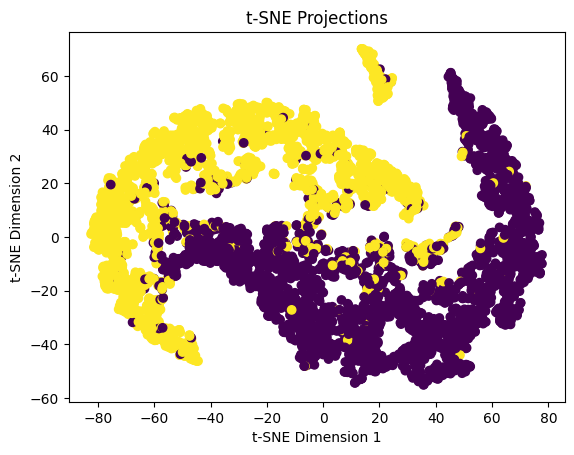

In [77]:
tsne = TSNE(n_components=2, random_state=42)
projections = tsne.fit_transform(trainoutputs)
# Plot the projections
plt.scatter(projections[:, 0], projections[:, 1],c=ytrain)
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.title('t-SNE Projections')
plt.show()

# PCA FOR ENCODER ON TRAIN

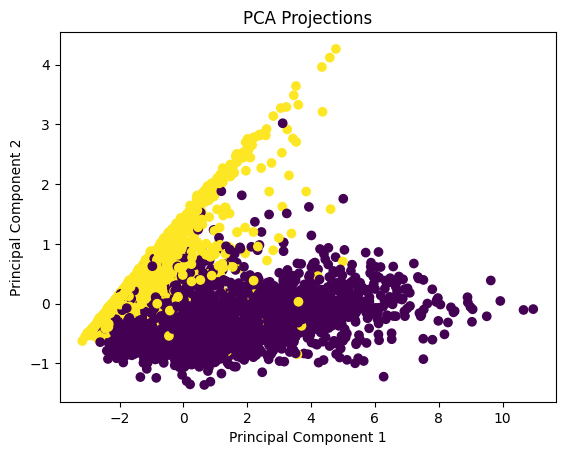

In [78]:
pca = PCA(n_components=2, random_state=42)
projections = pca.fit_transform(trainoutputs)
# Plot the projections
plt.scatter(projections[:, 0], projections[:, 1],c=ytrain)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Projections')
plt.show()

# TSNE FOR ENCODER ON TEST

In [80]:
testoutputs = encoder_with_projection_head.predict(xtest)

150/150 [==============================] - 0s 2ms/step


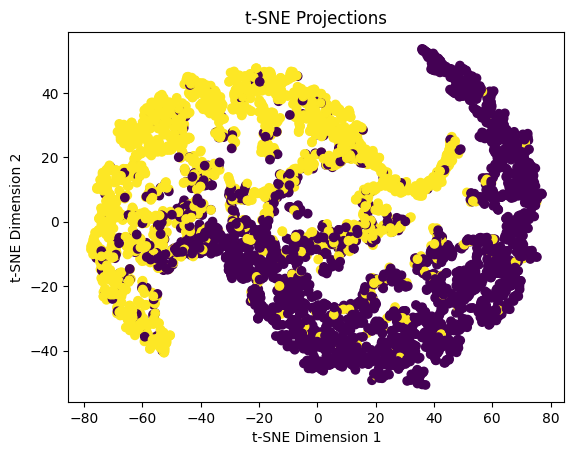

In [81]:
tsne = TSNE(n_components=2, random_state=42)
projections = tsne.fit_transform(testoutputs)
# Plot the projections
plt.scatter(projections[:, 0], projections[:, 1],c=ytest)
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.title('t-SNE Projections')
plt.show()

# PCA FOR ENCODER ON TEST

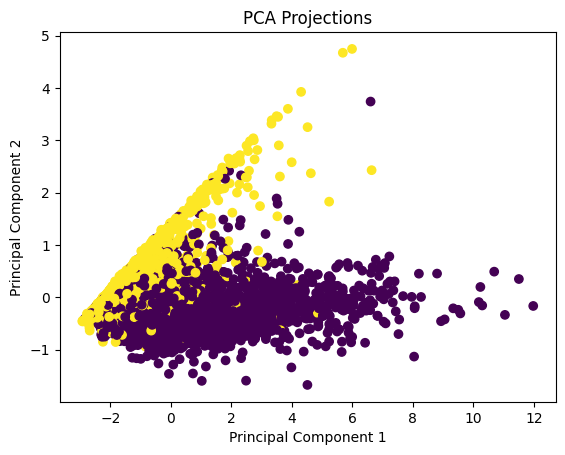

In [82]:
pca = PCA(n_components=2, random_state=42)
projections = pca.fit_transform(testoutputs)
# Plot the projections
plt.scatter(projections[:, 0], projections[:, 1],c=ytest)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Projections')
plt.show()

# Output of encoder as 2

In [102]:
class Encoder(Model):
  def __init__(self, latent_dim):
    super(Encoder, self).__init__()
    self.latent_dim = latent_dim 
    inputs = Input(shape=(38,1))
    outputs = inputs  
    self.encoder = tf.keras.Sequential([
      inputs,
      
      layers.Conv1D(filters=64, kernel_size=2, activation='relu'),
      layers.MaxPooling1D(pool_size=1),
      layers.Dropout(0.5),
      layers.Conv1D(filters=32, kernel_size=2, activation='relu'),
      layers.MaxPooling1D(pool_size=1),
      layers.Conv1D(filters=16, kernel_size=2, activation='relu'),
      layers.MaxPooling1D(pool_size=1),
      layers.Flatten(),
      layers.Dense(latent_dim, activation='relu'),
    ])

  def call(self, x):
    encoded = self.encoder(x)
    return encoded
latent_dim=30

def create_encoder():
    return Encoder(latent_dim)


def add_projection_head(Encoder):
    inp = keras.Input(shape=input_shape)
    hidden  = Encoder(inp)
    features = layers.Dense(4, activation="relu")(hidden)
    features = layers.Dense(2, activation="softmax")(features)
    model = keras.Model(
        inputs=inp, outputs=features, name="cifar-encoder_with_projection-head"
    )
    return model
input_shape = (38,1)
from keras.callbacks import ModelCheckpoint, EarlyStopping
import tensorflow_addons as tfa
encoder = create_encoder()
encoder_with_projection_head = add_projection_head(encoder)
encoder_with_projection_head.compile(optimizer=keras.optimizers.Adam(learning_rate),loss=SupervisedContrastiveLoss(temperature))
encoder_with_projection_head.summary()
history = encoder_with_projection_head.fit(xtra_a, ytra_a , validation_data =(xval_a,yval_a), batch_size=32, epochs=100, callbacks=[EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)])


Model: "cifar-encoder_with_projection-head"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_14 (InputLayer)       [(None, 38, 1)]           0         
                                                                 
 encoder_6 (Encoder)         (None, 30)                22190     
                                                                 
 dense_13 (Dense)            (None, 4)                 124       
                                                                 
 dense_14 (Dense)            (None, 2)                 10        
                                                                 
Total params: 22,324
Trainable params: 22,324
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
(None, 2)
(None, 2)
148/148 [==============================] - 2s 6ms/step - loss: 1.1983 - val_loss: 1.1862
Epoch 2/100
148/148 [==================

In [103]:
trainoutputs = encoder_with_projection_head.predict(xtrain)

185/185 [==============================] - 0s 2ms/step


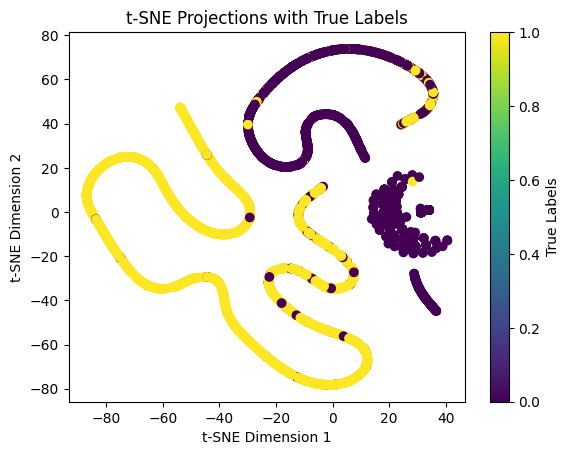

In [106]:
tsne = TSNE(n_components=2, random_state=42)
projections = tsne.fit_transform(trainoutputs)

# Plot the projections with true labels
plt.scatter(projections[:, 0], projections[:, 1], c=ytrain)
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.title('t-SNE Projections with True Labels')
plt.colorbar(label='True Labels')
plt.show()

In [108]:
testoutputs = encoder_with_projection_head.predict(xtest)

150/150 [==============================] - 0s 2ms/step


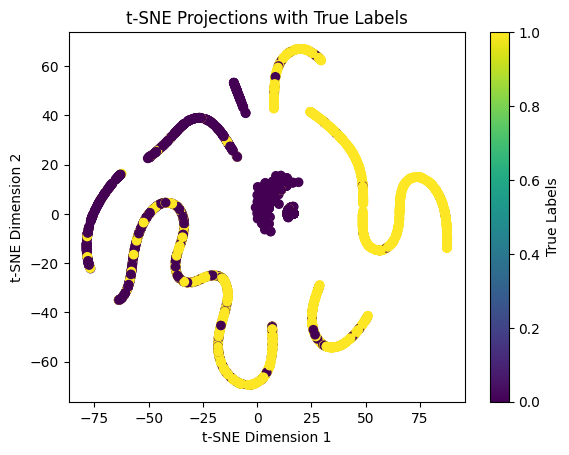

In [109]:
tsne = TSNE(n_components=2, random_state=42)
projections = tsne.fit_transform(testoutputs)
plt.scatter(projections[:, 0], projections[:, 1], c=ytest)
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.title('t-SNE Projections with True Labels')
plt.colorbar(label='True Labels')
plt.show()

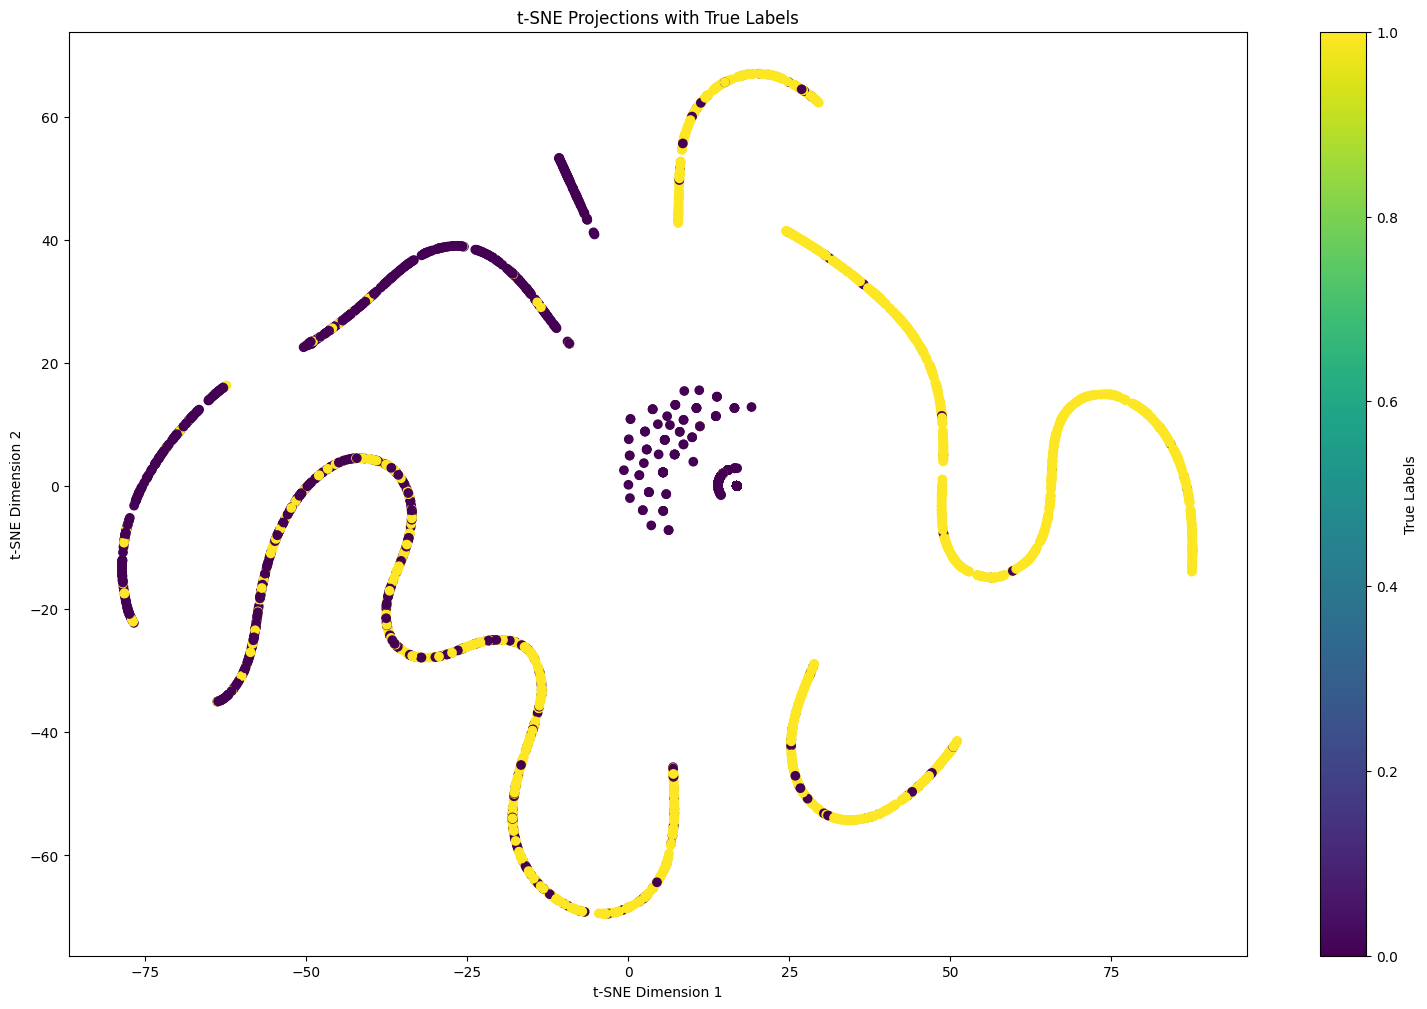

In [116]:
plt.figure(figsize=(19, 12))  # Set the desired width and height
plt.scatter(projections[:, 0], projections[:, 1], c=ytest)
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.title('t-SNE Projections with True Labels')
plt.colorbar(label='True Labels')
plt.show()